In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
MAX_SAMPLE = None
train_path = '/kaggle/input/coleridgeinitiative-show-us-the-data/train.csv'
train = pd.read_csv(train_path)
train = train[:MAX_SAMPLE]

paper_train_folder = '/kaggle/input/coleridgeinitiative-show-us-the-data/train'

In [3]:
train['cleaned_label'].nunique()

130

In [4]:
column_data = train['cleaned_label']
label_counts = column_data.value_counts()

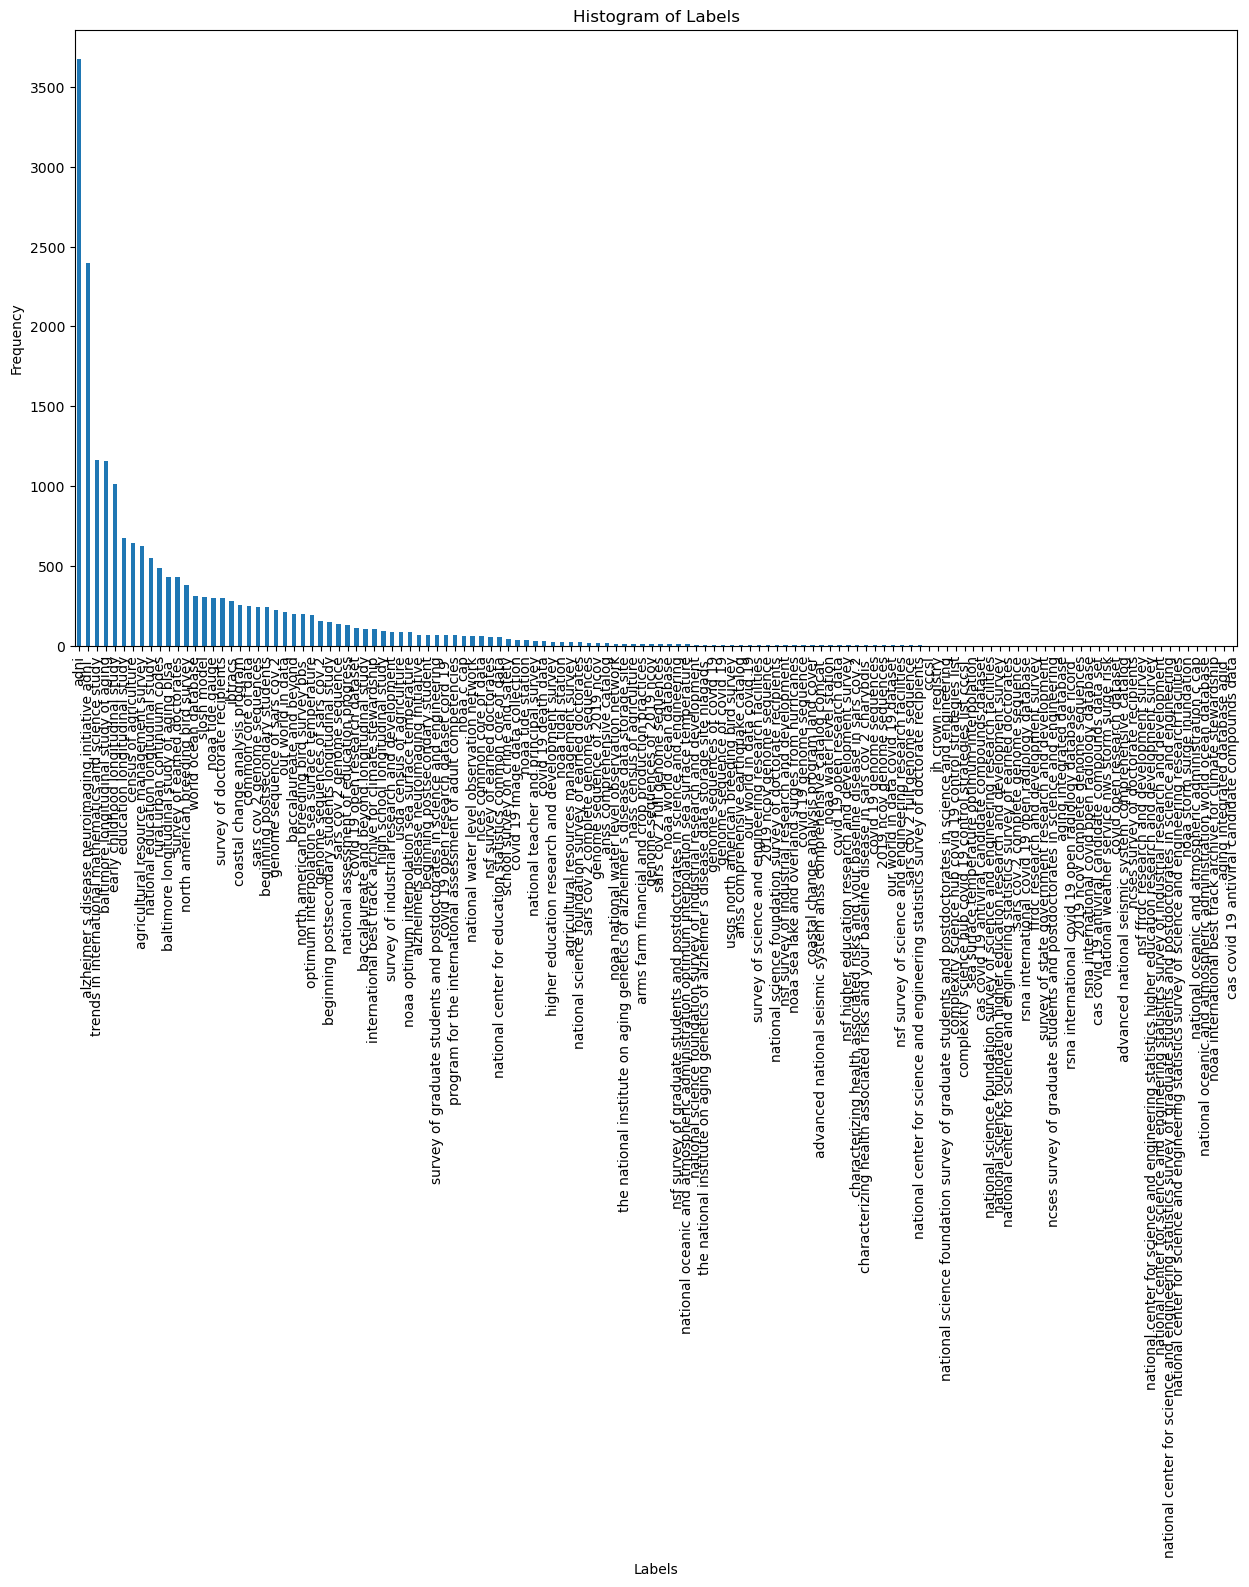

In [5]:
plt.figure(figsize=(15, 8))  # Set the size of the figure
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Labels')
plt.show()

In [6]:
label_counts = train['cleaned_label'].value_counts()

In [7]:
label_counts

adni                                                                    3673
alzheimer s disease neuroimaging initiative adni                        2400
trends in international mathematics and science study                   1163
baltimore longitudinal study of aging                                   1156
early childhood longitudinal study                                      1011
                                                                        ... 
national oceanic and atmospheric administration c cap                      1
national oceanic and atmospheric administration world ocean database       1
noaa international best track archive for climate stewardship              1
aging integrated database agid                                             1
cas covid 19 antiviral candidate compounds data                            1
Name: cleaned_label, Length: 130, dtype: int64

In [8]:
valid_labels = label_counts[label_counts >= 500].index

In [9]:
len(valid_labels)

9

In [10]:
filtered_train = train[train['cleaned_label'].isin(valid_labels)]

In [11]:
len(filtered_train)

11895

In [12]:
from sklearn.model_selection import train_test_split



# Split the filtered dataset into training and testing sets
train_df, test_df = train_test_split(filtered_train, test_size=0.25, random_state=42)

# Save the training and testing sets to CSV
train_df.to_csv('filtered_train_train.csv', index=False)
test_df.to_csv('filtered_train_test.csv', index=False)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
len(train_df)

8921

In [14]:
train_df = train_df.groupby('Id').agg({
    'pub_title': 'first',
    'dataset_title': '|'.join,
    'dataset_label': '|'.join,
    'cleaned_label': '|'.join
}).reset_index()

print(f'No. grouped training rows: {len(train_df)}')

No. grouped training rows: 7272


In [15]:
papers = {}
for paper_id in train_df['Id'].unique():
    with open(f'{paper_train_folder}/{paper_id}.json', 'r') as f:
        paper = json.load(f)
        papers[paper_id] = paper

In [16]:
test_df = test_df.groupby('Id').agg({
    'pub_title': 'first',
    'dataset_title': '|'.join,
    'dataset_label': '|'.join,
    'cleaned_label': '|'.join
}).reset_index()

print(f'No. grouped training rows: {len(test_df)}')

No. grouped training rows: 2760


In [17]:
import pandas as pd

# Create a dictionary with the required columns
submission_data = {
    'Id': test_df['Id'],
    'PredictionString': [None] * len(test_df)
}

# Create a DataFrame from the dictionary
sample_submission = pd.DataFrame(submission_data)

# Save the DataFrame as sample_submission.csv
sample_submission.to_csv('sample_submission.csv', index=False)

In [18]:
sample_submission.head()

,Id,PredictionString
0,0008656f-0ba2-4632-8602-3017b44c2e90,None
1,002203f0-1c57-4400-abc1-b783c4085743,None
2,002fdc24-9ee2-42b5-b051-373faca90c4e,None
3,0030f840-8505-49c0-9991-da0d4c6c9496,None
4,0035a1ba-6d1e-487b-bc3d-d49c5d64a3e9,None


In [19]:
len(sample_submission)

2760

In [20]:
paper_test_folder = '/kaggle/input/coleridgeinitiative-show-us-the-data/train'
for paper_id in sample_submission['Id']:
    with open(f'{paper_test_folder}/{paper_id}.json', 'r') as f:
        paper_test = json.load(f)
        papers[paper_id] = paper_test

In [21]:
len(papers)

8944

In [22]:
!pip install datasets --no-index --find-links=file:///kaggle/input/coleridge-packages/packages/datasets
!pip install /kaggle/input/coleridge-packages/seqeval-1.2.2-py3-none-any.whl
!pip install /kaggle/input/coleridge-packages/tokenizers-0.10.1-cp37-cp37m-manylinux1_x86_64.whl
!pip install /kaggle/input/coleridge-packages/transformers-4.5.0.dev0-py3-none-any.whl

Looking in links: file:///kaggle/input/coleridge-packages/packages/datasets
Processing /kaggle/input/coleridge-packages/seqeval-1.2.2-py3-none-any.whl
ERROR: tokenizers-0.10.1-cp37-cp37m-manylinux1_x86_64.whl is not a supported wheel on this platform.
Processing /kaggle/input/coleridge-packages/transformers-4.5.0.dev0-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 17.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [51 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-310
      creating

In [23]:
import os
import re
import json
import time
import datetime
import random
import glob
import importlib

import numpy as np
import pandas as pd

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(123)
np.random.seed(456)

In [24]:
MAX_LENGTH = 64 
OVERLAP = 20
PREDICT_BATCH = 64000 

In [25]:
all_labels = set()

for label_1, label_2, label_3 in train_df[['dataset_title', 'dataset_label', 'cleaned_label']].itertuples(index=False):
    all_labels.add(str(label_1).lower())
    all_labels.add(str(label_2).lower())
    all_labels.add(str(label_3).lower())
    
print(f'No. different labels: {len(all_labels)}')

No. different labels: 60


In [26]:
len(train_df)

7272

In [27]:
def clean_text(txt):
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower()).strip()

def totally_clean_text(txt):
    txt = clean_text(txt)
    txt = re.sub(' +', ' ', txt)
    return txt

In [28]:
literal_preds = []

for paper_id in sample_submission['Id']:
    paper = papers[paper_id]
    text_1 = '. '.join(section['text'] for section in paper).lower()
    text_2 = totally_clean_text(text_1)
    
    labels = set()
    for label in all_labels:
        if label in text_1 or label in text_2:
            labels.add(clean_text(label))
    
    literal_preds.append('|'.join(labels))

In [29]:
literal_preds[:5]

['trends in international mathematics and science study',
 'alzheimer s disease neuroimaging initiative adni|adni',
 'alzheimer s disease neuroimaging initiative adni|adni',
 'adni',
 'baltimore longitudinal study of aging blsa|baltimore longitudinal study of aging']

In [30]:
!cp /kaggle/input/coleridge-packages/my_seqeval.py ./

In [31]:
def clean_training_text(txt):
    """
    similar to the default clean_text function but without lowercasing.
    """
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt)).strip()

def shorten_sentences(sentences):
    short_sentences = []
    for sentence in sentences:
        words = sentence.split()
        if len(words) > MAX_LENGTH:
            for p in range(0, len(words), MAX_LENGTH - OVERLAP):
                short_sentences.append(' '.join(words[p:p+MAX_LENGTH]))
        else:
            short_sentences.append(sentence)
    return short_sentences

def find_sublist(big_list, small_list):
    all_positions = []
    for i in range(len(big_list) - len(small_list) + 1):
        if small_list == big_list[i:i+len(small_list)]:
            all_positions.append(i)
    
    return all_positions

def tag_sentence(sentence, labels): # requirement: both sentence and labels are already cleaned
    sentence_words = sentence.split()
    
    if labels is not None and any(re.findall(f'\\b{label}\\b', sentence)
                                  for label in labels): # positive sample
        nes = ['O'] * len(sentence_words)
        for label in labels:
            label_words = label.split()

            all_pos = find_sublist(sentence_words, label_words)
            for pos in all_pos:
                nes[pos] = 'B'
                for i in range(pos+1, pos+len(label_words)):
                    nes[i] = 'I'

        return True, list(zip(sentence_words, nes))
        
    else: # negative sample
        nes = ['O'] * len(sentence_words)
        return False, list(zip(sentence_words, nes))

In [32]:
cnt_pos, cnt_neg = 0, 0 # number of sentences that contain/not contain labels
ner_data = []

pbar = tqdm(total=len(train_df))
for i, id, dataset_label in train_df[['Id', 'dataset_label']].itertuples():
    # paper
    paper = papers[id]
    
    # labels
    labels = dataset_label.split('|')
    labels = [clean_training_text(label) for label in labels]
    
    # sentences
    sentences = set([clean_training_text(sentence) for section in paper 
                 for sentence in section['text'].split('.') 
                ])
    sentences = shorten_sentences(sentences) # make sentences short
    sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
    
    # positive sample
    for sentence in sentences:
        is_positive, tags = tag_sentence(sentence, labels)
        if is_positive:
            cnt_pos += 1
            ner_data.append(tags)
        elif any(word in sentence.lower() for word in ['data', 'study']): 
            ner_data.append(tags)
            cnt_neg += 1
    
    # process bar
    pbar.update(1)
    pbar.set_description(f"Training data size: {cnt_pos} positives + {cnt_neg} negatives")

# shuffling
random.shuffle(ner_data)

Training data size: 28989 positives + 253840 negatives: 100%|██████████| 7272/7272 [01:22<00:00, 101.52it/s]

In [33]:
with open('train_ner.json', 'w') as f:
    for row in ner_data:
        words, nes = list(zip(*row))
        row_json = {'tokens' : words, 'tags' : nes}
        json.dump(row_json, f)
        f.write('\n')

In [34]:
!python /kaggle/input/kaggle-ner-utils/kaggle_run_ner.py \
--model_name_or_path 'bert-base-cased' \
--train_file './train_ner.json' \
--validation_file './train_ner.json' \
--num_train_epochs 1 \
--per_device_train_batch_size 8 \
--per_device_eval_batch_size 8 \
--save_steps 15000 \
--output_dir './output' \
--report_to 'none' \
--seed 123 \
--do_train 

Training data size: 28989 positives + 253840 negatives: 100%|██████████| 7272/7272 [01:40<00:00, 101.52it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [47]:
!python /kaggle/input/kaggle-ner-utils/kaggle_run_ner.py \
--model_name_or_path 'bert-base-cased' \
--train_file './train_ner.json' \
--validation_file './train_ner.json' \
--num_train_epochs 1 \
--per_device_train_batch_size 8 \
--per_device_eval_batch_size 8 \
--save_steps 15000 \
--output_dir './output' \
--report_to 'none' \
--seed 123 \
--do_eval

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [37]:
MAX_LENGTH = 64 # max no. words for each sentence.
OVERLAP = 20 # if a sentence exceeds MAX_LENGTH, we split it to multiple sentences with overlapping

PREDICT_BATCH = 64000 

PRETRAINED_PATH = './output'
TEST_INPUT_SAVE_PATH = './input_data'
TEST_NER_DATA_FILE = 'test_ner_input.json'
TRAIN_PATH = 'train_ner.json'
VAL_PATH = 'train_ner.json'

PREDICTION_SAVE_PATH = './pred'
PREDICTION_FILE = 'test_predictions.txt'

In [38]:
test_rows = [] # test data in NER format
paper_length = [] # store the number of sentences each paper has

for paper_id in sample_submission['Id']:
    # load paper
    paper = papers[paper_id]
    
    # extract sentences
    sentences = [clean_training_text(sentence) for section in paper 
                 for sentence in section['text'].split('.')
                ]
    sentences = shorten_sentences(sentences) # make sentences short
    sentences = [sentence for sentence in sentences if len(sentence) > 10] # only accept sentences with length > 10 chars
    sentences = [sentence for sentence in sentences if any(word in sentence.lower() for word in ['data', 'study'])]
        
    # collect all sentences in json
    for sentence in sentences:
        sentence_words = sentence.split()
        dummy_tags = ['O']*len(sentence_words)
        test_rows.append({'tokens' : sentence_words, 'tags' : dummy_tags})
    
    # track which sentence belongs to which data point
    paper_length.append(len(sentences))
    
print(f'total number of sentences: {len(test_rows)}')

total number of sentences: 106353


In [39]:
os.environ["MODEL_PATH"] = f"{PRETRAINED_PATH}"
os.environ["TRAIN_FILE"] = f"{TRAIN_PATH}"
os.environ["VALIDATION_FILE"] = f"{VAL_PATH}"
os.environ["TEST_FILE"] = f"{TEST_INPUT_SAVE_PATH}/{TEST_NER_DATA_FILE}"
os.environ["OUTPUT_DIR"] = f"{PREDICTION_SAVE_PATH}"

In [40]:
os.makedirs(TEST_INPUT_SAVE_PATH, exist_ok=True)

In [48]:
def bert_predict():
    !python /kaggle/input/kaggle-ner-utils/kaggle_run_ner.py \
    --model_name_or_path "$MODEL_PATH" \
    --train_file "$TRAIN_FILE" \
    --validation_file "$VALIDATION_FILE" \
    --test_file "$TEST_FILE" \
    --output_dir "$OUTPUT_DIR" \
    --report_to 'none' \
    --seed 123 \
    --do_predict

In [49]:
!pip install --upgrade transformers
!pip install --upgrade accelerate

In [50]:
bert_outputs = []

for batch_begin in range(0, len(test_rows), PREDICT_BATCH):
    # write data rows to input file
    with open(f'{TEST_INPUT_SAVE_PATH}/{TEST_NER_DATA_FILE}', 'w') as f:
        for row in test_rows[batch_begin:batch_begin+PREDICT_BATCH]:
            json.dump(row, f)
            f.write('\n')
    
    # remove output dir
    !rm -r "$OUTPUT_DIR"
    bert_predict()
    
    # read predictions
    with open(f'{PREDICTION_SAVE_PATH}/{PREDICTION_FILE}') as f:
        this_preds = f.read().split('\n')[:-1]
        bert_outputs += [pred.split() for pred in this_preds]

rm: cannot remove './pred': No such file or directory
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file

In [51]:
# get test sentences
test_sentences = [row['tokens'] for row in test_rows]

del test_rows

In [52]:
bert_dataset_labels = [] # store all dataset labels for each publication

for length in paper_length:
    labels = set()
    for sentence, pred in zip(test_sentences[:length], bert_outputs[:length]):
        curr_phrase = ''
        for word, tag in zip(sentence, pred):
            if tag == 'B': # start a new phrase
                if curr_phrase:
                    labels.add(curr_phrase)
                    curr_phrase = ''
                curr_phrase = word
            elif tag == 'I' and curr_phrase: # continue the phrase
                curr_phrase += ' ' + word
            else: # end last phrase (if any)
                if curr_phrase:
                    labels.add(curr_phrase)
                    curr_phrase = ''
        # check if the label is the suffix of the sentence
        if curr_phrase:
            labels.add(curr_phrase)
            curr_phrase = ''
    
    # record dataset labels for this publication
    bert_dataset_labels.append(labels)
    
    del test_sentences[:length], bert_outputs[:length]

In [53]:
bert_dataset_labels[:5]

[{'Trends in International Mathematics and Science Study'},
 {'ADNI', 'Alzheimer s Disease Neuroimaging Initiative ADNI'},
 {'ADNI', 'Alzheimer s Disease Neuroimaging Initiative ADNI'},
 {'ADNI'},
 {'Baltimore Longitudinal Study of Aging'}]

In [54]:
def jaccard_similarity(s1, s2):
    l1 = s1.split(" ")
    l2 = s2.split(" ")    
    intersection = len(list(set(l1).intersection(l2)))
    union = (len(l1) + len(l2)) - intersection
    return float(intersection) / union

filtered_bert_labels = []

for labels in bert_dataset_labels:
    filtered = []
    
    for label in sorted(labels, key=len):
        label = clean_text(label)
        if len(filtered) == 0 or all(jaccard_similarity(label, got_label) < 0.75 for got_label in filtered):
            filtered.append(label)
    
    filtered_bert_labels.append('|'.join(filtered))

In [55]:
filtered_bert_labels[:5]

['trends in international mathematics and science study',
 'adni|alzheimer s disease neuroimaging initiative adni',
 'adni|alzheimer s disease neuroimaging initiative adni',
 'adni',
 'baltimore longitudinal study of aging']

In [56]:
final_predictions = []
for literal_match, bert_pred in zip(literal_preds, filtered_bert_labels):
    if literal_match:
        final_predictions.append(literal_match)
    else:
        final_predictions.append(bert_pred)

In [57]:
sample_submission['PredictionString'] = final_predictions
sample_submission.head()

,Id,PredictionString
0,0008656f-0ba2-4632-8602-3017b44c2e90,trends in international mathematics and scienc...
1,002203f0-1c57-4400-abc1-b783c4085743,alzheimer s disease neuroimaging initiative ad...
2,002fdc24-9ee2-42b5-b051-373faca90c4e,alzheimer s disease neuroimaging initiative ad...
3,0030f840-8505-49c0-9991-da0d4c6c9496,adni
4,0035a1ba-6d1e-487b-bc3d-d49c5d64a3e9,baltimore longitudinal study of aging blsa|bal...


In [59]:
test_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,0008656f-0ba2-4632-8602-3017b44c2e90,Finnish Ninth Graders’ Gender Appropriateness ...,Trends in International Mathematics and Scienc...,Trends in International Mathematics and Scienc...,trends in international mathematics and scienc...
1,002203f0-1c57-4400-abc1-b783c4085743,A Hybrid Geometric–Statistical Deformable Mode...,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
2,002fdc24-9ee2-42b5-b051-373faca90c4e,Study of the Influence of Age in 18F-FDG PET I...,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
3,0030f840-8505-49c0-9991-da0d4c6c9496,MR‐assisted PET motion correction in simultane...,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
4,0035a1ba-6d1e-487b-bc3d-d49c5d64a3e9,A General Fast Registration Framework by Learn...,Baltimore Longitudinal Study of Aging (BLSA),Baltimore Longitudinal Study of Aging,baltimore longitudinal study of aging
